<a href="https://colab.research.google.com/github/LudovicO42/D-tecteur-de-bad-buzz/blob/main/Mod%C3%A8le_DeepLearning_Bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 : On importe le jeu de données, on définit les variables, puis on sépare les données en deux types : les "train" et les "test".
# On comparera ensuite les deux valeurs pour constater l'efficacité de l'algorythme.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


file_path = 'train.csv'


# Import du jeu de données
df = pd.read_csv(file_path)

X = df.drop(['ID', 'contact', 'month', 'day', 'y'], axis=1)
y = df['y']

# Encodage des variables catégorielles
le = LabelEncoder()
X['job'] = le.fit_transform(X['job'])
X['marital'] = le.fit_transform(X['marital'])
X['education'] = le.fit_transform(X['education'])
X['default'] = le.fit_transform(X['default'])
X['housing'] = le.fit_transform(X['housing'])
X['loan'] = le.fit_transform(X['loan'])
X['poutcome'] = le.fit_transform(X['poutcome'])

y = le.fit_transform(y)

# Normalisation des données
sc = StandardScaler()
X = sc.fit_transform(X)

# Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Question 2 : On définit l'architecture du réseau de neurones avec 3 couches cachées, et 10 neurones/couche (sauf la couche de sortie avec 1 seul neurone)

In [43]:
import tensorflow as tf

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, input_dim=input_dim, activation='relu'))

        # Deuxième couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, activation='relu'))
        self.model.add(tf.keras.layers.Dense(10, activation='relu'))

        # Couche de sortie de 1 neurones
        self.model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

model = MultiLayerPerceptron(12, 1).model



# Question 3 : On compile le modèle avec adam et "binary_crossentropy"

In [26]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 10)                130       
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [25]:
X_train.shape

(10296, 12)

# Question 4 : On entraîne le modèle sur la BDD

In [27]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=32)

Epoch 1/10
322/322 [==============================] - 2s 2ms/step - loss: 0.5921 - accuracy: 0.7125 - val_loss: 0.5500 - val_accuracy: 0.7455
Epoch 2/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5562 - accuracy: 0.7318 - val_loss: 0.5408 - val_accuracy: 0.7486
Epoch 3/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5484 - accuracy: 0.7373 - val_loss: 0.5396 - val_accuracy: 0.7486
Epoch 4/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5437 - accuracy: 0.7412 - val_loss: 0.5377 - val_accuracy: 0.7510
Epoch 5/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5411 - accuracy: 0.7439 - val_loss: 0.5321 - val_accuracy: 0.7572
Epoch 6/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5390 - accuracy: 0.7467 - val_loss: 0.5331 - val_accuracy: 0.7529
Epoch 7/10
322/322 [==============================] - 1s 2ms/step - loss: 0.5375 - accuracy: 0.7474 - val_loss: 0.5327 - val_accuracy: 0.7549
Epoch 

# Question 5 : On affiche un graphe indiquant l'évolution du modèle en fonction du temps

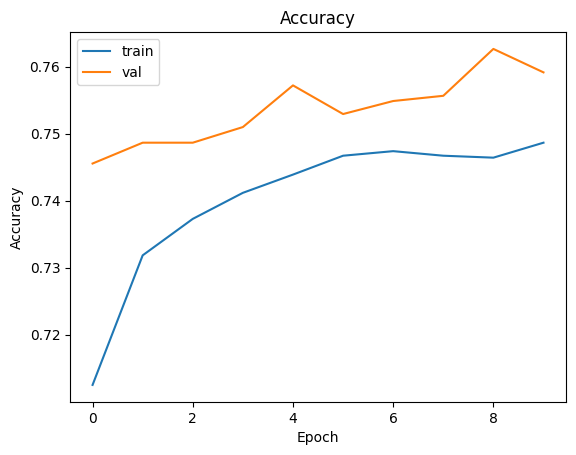

In [28]:
plot_history(history)

# Question 6 : On utilise predict() pour prédire puis accuracy_score pour obtenir le taux de précision du modèle.

In [33]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

81/81 [==============================] - 1s 6ms/step


In [39]:
y_pred > 0.5

array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [40]:
y_pred

array([[0.15805596],
       [0.5955869 ],
       [0.7841495 ],
       ...,
       [0.6218447 ],
       [0.2462312 ],
       [0.36299416]], dtype=float32)

In [31]:
accuracy = accuracy_score(y_test, y_pred_class)

print('Accuracy:', accuracy)

Accuracy: 0.7591297591297591


# Question 7 : On affiche le poids du modèle

In [41]:
weights = model.get_weights()
print(weights)

[array([[ 2.18423396e-01,  1.17673025e-01,  3.83195788e-01,
         2.98890084e-01,  3.17397326e-01,  7.60808215e-02,
         5.95880747e-01,  3.31644535e-01, -6.74589455e-01,
        -4.01300862e-02],
       [-1.48438603e-01,  3.44164580e-01,  2.48961598e-01,
         4.23915327e-01, -4.83419374e-02,  1.66778803e-01,
         3.50948900e-01, -3.63426030e-01, -5.60971387e-02,
        -4.31375921e-01],
       [-4.03766939e-03, -1.33139279e-03,  1.82655916e-01,
         3.56588244e-01, -6.61635324e-02,  1.65228650e-01,
         1.35973588e-01, -3.01820993e-01,  8.38700458e-02,
        -2.58853674e-01],
       [ 2.83602238e-01,  1.57387957e-01,  3.01144212e-01,
         2.73905903e-01, -1.90216631e-01,  1.48282290e-01,
         1.53825626e-01,  1.56010389e-01,  2.23656923e-01,
         1.09528542e-01],
       [-4.32676464e-01,  2.75541872e-01, -2.65291870e-01,
        -8.29725116e-02, -2.16356531e-01, -4.13107276e-02,
         6.83759972e-02, -1.04245670e-01,  3.32347423e-01,
         3

# Les poids sont stockés sous forme de tableaux, qui sont des couches du modèle, et pour chaque couche, il y a deux tableaux, un pour les poids et un autre pour les biais.


# Question 8 : 

In [ ]:
#premier modèle 

In [168]:
import tensorflow as tf

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 5 neurones
        self.model.add(tf.keras.layers.Dense(5, input_dim=input_dim, activation='sigmoid'))

        # Troisième couche cachée de 2 neurones
        self.model.add(tf.keras.layers.Dense(2, activation='softmax'))
        self.model.add(tf.keras.layers.Dense(2, activation='softmax'))

        # Couche de sortie de 1 neurones
        self.model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

model = MultiLayerPerceptron(12, 1).model

In [169]:
model.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 5)                 65        
                                                                 
 dense_121 (Dense)           (None, 2)                 12        
                                                                 
 dense_122 (Dense)           (None, 2)                 6         
                                                                 
 dense_123 (Dense)           (None, 1)                 3         
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


In [170]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=25)

Epoch 1/10
412/412 [==============================] - 2s 2ms/step - loss: 0.5231 - accuracy: 0.3695 - val_loss: 0.4885 - val_accuracy: 0.7051
Epoch 2/10
412/412 [==============================] - 1s 2ms/step - loss: 0.4581 - accuracy: 0.6884 - val_loss: 0.4233 - val_accuracy: 0.7051
Epoch 3/10
412/412 [==============================] - 1s 2ms/step - loss: 0.4086 - accuracy: 0.6884 - val_loss: 0.3813 - val_accuracy: 0.7051
Epoch 4/10
412/412 [==============================] - 1s 2ms/step - loss: 0.3787 - accuracy: 0.6884 - val_loss: 0.3567 - val_accuracy: 0.7051
Epoch 5/10
412/412 [==============================] - 1s 2ms/step - loss: 0.3610 - accuracy: 0.6884 - val_loss: 0.3418 - val_accuracy: 0.7051
Epoch 6/10
412/412 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.6884 - val_loss: 0.3321 - val_accuracy: 0.7051
Epoch 7/10
412/412 [==============================] - 1s 2ms/step - loss: 0.3426 - accuracy: 0.6884 - val_loss: 0.3256 - val_accuracy: 0.7051
Epoch 

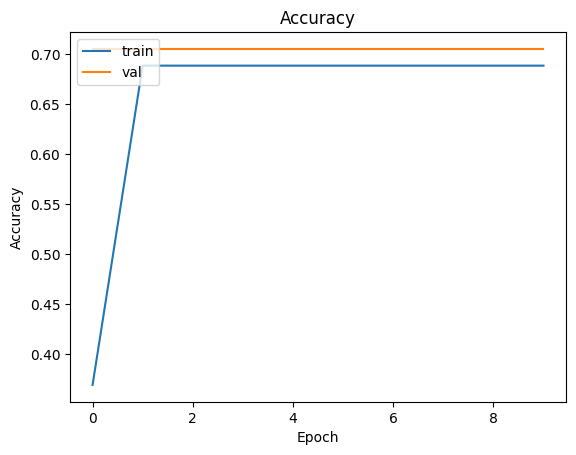

In [171]:
plot_history(history)


In [172]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test) > 0.5

accuracy = accuracy_score(y_test, y_pred> 0.5)

print('Accuracy:', accuracy)


81/81 [==============================] - 0s 1ms/step
Accuracy: 0.7051282051282052


In [ ]:
#2e modèle

In [113]:
import tensorflow as tf

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Seule couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(10, input_dim=input_dim, activation='tanh'))

        # Couche de sortie de 1 neurones
        self.model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

model = MultiLayerPerceptron(12, 1).model

In [122]:
model.compile(optimizer='Nadam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 10)                130       
                                                                 
 dense_97 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [123]:
X_train.shape

(10296, 12)

In [124]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=20)

Epoch 1/5
515/515 [==============================] - 3s 4ms/step - loss: 0.2196 - accuracy: 0.6490 - val_loss: 0.1882 - val_accuracy: 0.7246
Epoch 2/5
515/515 [==============================] - 2s 3ms/step - loss: 0.1902 - accuracy: 0.7243 - val_loss: 0.1833 - val_accuracy: 0.7370
Epoch 3/5
515/515 [==============================] - 2s 4ms/step - loss: 0.1876 - accuracy: 0.7306 - val_loss: 0.1816 - val_accuracy: 0.7424
Epoch 4/5
515/515 [==============================] - 2s 3ms/step - loss: 0.1864 - accuracy: 0.7330 - val_loss: 0.1807 - val_accuracy: 0.7370
Epoch 5/5
515/515 [==============================] - 1s 2ms/step - loss: 0.1850 - accuracy: 0.7340 - val_loss: 0.1792 - val_accuracy: 0.7444


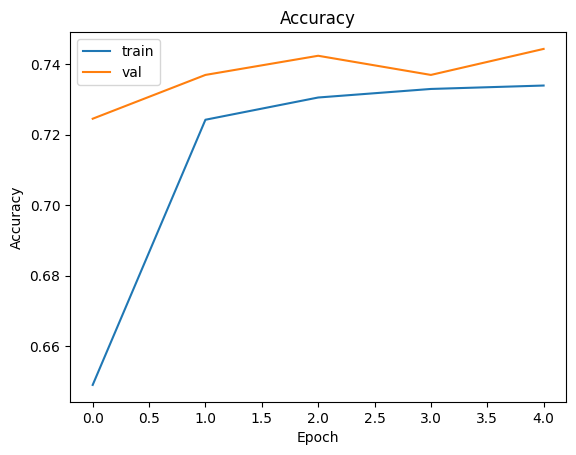

In [125]:
plot_history(history)

In [157]:
y_pred > 0.5

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [158]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test) > 0.5

accuracy = accuracy_score(y_test, y_pred> 0.5)

print('Accuracy:', accuracy)

81/81 [==============================] - 0s 1ms/step
Accuracy: 0.7451437451437452


In [ ]:
#3e modèle

In [160]:
class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 5 neurones
        self.model.add(tf.keras.layers.Dense(5, input_dim=input_dim, activation='tanh'))

        # Deuxième couche cachée de 7 neurones
        self.model.add(tf.keras.layers.Dense(7, input_dim=input_dim, activation='tanh'))

        # Couche de sortie de 1 neurones
        self.model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

model = MultiLayerPerceptron(12, 1).model

In [161]:
model.compile(optimizer='RMSprop', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (None, 5)                 65        
                                                                 
 dense_114 (Dense)           (None, 7)                 42        
                                                                 
 dense_115 (Dense)           (None, 1)                 8         
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [162]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10, batch_size=12)

Epoch 1/10
858/858 [==============================] - 2s 2ms/step - loss: 0.2021 - accuracy: 0.7002 - val_loss: 0.1857 - val_accuracy: 0.7424
Epoch 2/10
858/858 [==============================] - 1s 2ms/step - loss: 0.1893 - accuracy: 0.7294 - val_loss: 0.1811 - val_accuracy: 0.7455
Epoch 3/10
858/858 [==============================] - 2s 2ms/step - loss: 0.1862 - accuracy: 0.7325 - val_loss: 0.1802 - val_accuracy: 0.7459
Epoch 4/10
858/858 [==============================] - 2s 2ms/step - loss: 0.1849 - accuracy: 0.7358 - val_loss: 0.1784 - val_accuracy: 0.7498
Epoch 5/10
858/858 [==============================] - 1s 2ms/step - loss: 0.1841 - accuracy: 0.7385 - val_loss: 0.1781 - val_accuracy: 0.7514
Epoch 6/10
858/858 [==============================] - 2s 2ms/step - loss: 0.1836 - accuracy: 0.7380 - val_loss: 0.1775 - val_accuracy: 0.7502
Epoch 7/10
858/858 [==============================] - 2s 2ms/step - loss: 0.1831 - accuracy: 0.7382 - val_loss: 0.1778 - val_accuracy: 0.7459
Epoch 

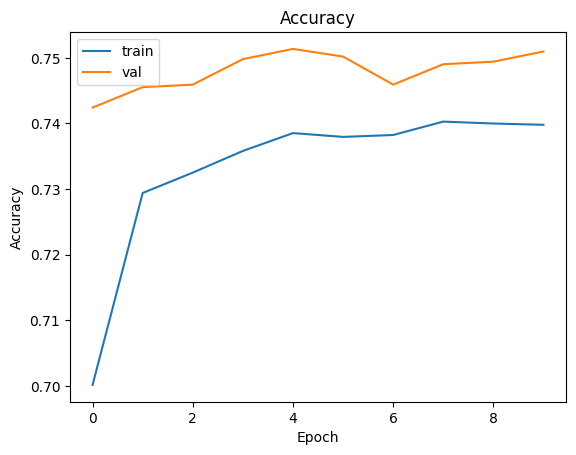

In [163]:
plot_history(history)

In [164]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test) > 0.5

accuracy = accuracy_score(y_test, y_pred> 0.5)

print('Accuracy:', accuracy)

81/81 [==============================] - 0s 2ms/step
Accuracy: 0.750971250971251


In [ ]:
# Le premier modèle présente un taux de précision de 0,705.
# Le deuxième modèle présente un taux de précision de 0,745.
# Le Troisième modèle présente un taux de précision de 0,751.

# Le meilleur modèle est donc le 3e !

# Question 9 : Sauvegarde du fichier puis chargement du fichier

In [181]:
from tensorflow import keras

model.save('topmodel.h5')

In [182]:
model = keras.models.load_model('topmodel.h5')